In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv('credit.csv')
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [4]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [9]:
X = df.drop('fraud', axis = 1)
y = df['fraud']

0.0    912597
1.0     87403
Name: fraud, dtype: int64

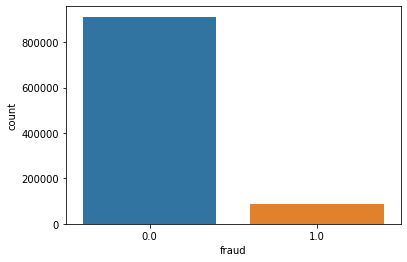

In [10]:
sns.countplot(x = df['fraud'])
df['fraud'].value_counts()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
X_train.shape, X_test.shape

((800000, 7), (200000, 7))

In [21]:
sm = SMOTE(random_state=42, sampling_strategy=1.0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [22]:
print(X_train_res.shape, y_train_res.shape)

(1460080, 7) (1460080,)


In [17]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=42)
clf_rf.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=25, random_state=42)

In [18]:
print(classification_report(y_test, clf_rf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



In [ ]:
df_x = df.drop('fraud', axis = 1)
df_y = df['fraud']

0.0    912597
1.0     87403
Name: fraud, dtype: int64

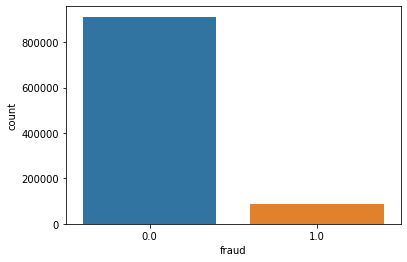

In [83]:
sns.countplot(x = df['fraud'])
df['fraud'].value_counts()

In [ ]:
nm = NearMiss()
X,y = nm.fit_resample(df_x,df_y)

(174806, 7) (174806,)


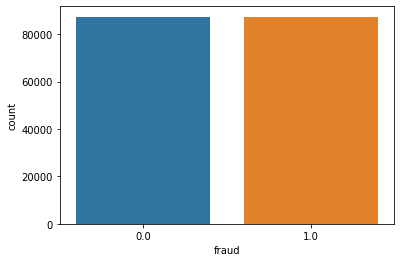

In [53]:
sns.countplot(x = y)
print(X.shape, y.shape)

In [92]:
rs = RobustScaler()
X = rs.fit_transform(X)


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

X_train.shape, X_test.shape

((139844, 7), (34962, 7))

In [94]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

MLPClassifier()

In [95]:
pred = mlp.predict(X_test)

In [96]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17474
         1.0       1.00      1.00      1.00     17488

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962



Conclusion - Both preprocessing methods yield similar results, however an oversampled machine learning algorithm will tend to perform better with unseen circumstances , as the algorithm has been trained using all of the data available. The use of the random forest classifier also means the results are less likely to be overfitted, if overfitting is an issue the number of trees parameter can be fine tuned using GridSearchCV.